In [1]:
import pandas as pd
import numpy as np
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras import regularizers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../data/MIMIC_train_test.csv')
df.drop(columns='Unnamed: 0',inplace=True)

In [45]:
# Split the train and test data
X = df['text_list']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 42)

### The maxmum length of each row in range of 4 - 100

In [4]:
# prepare tokenizer

t = Tokenizer(num_words=1000)
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1
# # integer encode the documents
encoded_docs = t.texts_to_sequences(X_train)
encoded_docs_test = t.texts_to_sequences(X_test)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=max_length, padding='post')

In [19]:
padded_docs[4]

array([121, 207, 398,  38], dtype=int32)

In [166]:
# change the max_length to 20
max_length = 20
padded_docs_1 = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_docs_test_1 = pad_sequences(encoded_docs_test, maxlen=max_length, padding='post')

In [185]:
# change the max_length to 50
max_length = 50
padded_docs_2 = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_docs_test_2 = pad_sequences(encoded_docs_test, maxlen=max_length, padding='post')

In [189]:
# change the max_length to 100
max_length = 100
padded_docs_3 = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_docs_test_3 = pad_sequences(encoded_docs_test, maxlen=max_length, padding='post')

In [46]:
# change the max_length to 100
max_length = 80
padded_docs_4 = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_docs_test_4 = pad_sequences(encoded_docs_test, maxlen=max_length, padding='post')

In [21]:
vocab_size

42825

In [47]:
y_train = array(y_train)
y_test = array(y_test)

In [48]:
smt = SMOTE()

In [49]:

X_train_sm, y_train_sm = smt.fit_sample(padded_docs, y_train)
X_test_sm, y_test_sm = smt.fit_sample(padded_docs_test, y_test)
print(len(X_train_sm), len(y_train_sm))
print(len(X_test_sm), len(y_test_sm))

8996 8996
3020 3020


In [175]:
X_train_sm

array([[179, 454, 454, 207],
       [ 10, 132, 398,  38],
       [109, 106, 398,  38],
       ...,
       [117,  74,  48,  88],
       [179, 454, 454, 207],
       [ 10, 132, 398,  38]], dtype=int32)

In [170]:
X_train_sm_1, y_train_sm_1 = smt.fit_sample(padded_docs_1, y_train)
X_test_sm_1, y_test_sm_1 = smt.fit_sample(padded_docs_test_1, y_test)
print(len(X_train_sm_1), len(y_train_sm_1))
print(len(X_test_sm_1), len(y_test_sm_1))

8996 8996
3020 3020


In [171]:
X_train_sm_1[1]

array([ 10, 132, 432,  32,  22, 271,  32,  22,  82,  10, 132, 727,  77,
        55,  22,  82,  10, 132, 398,  38], dtype=int32)

In [186]:
X_train_sm_2, y_train_sm_2 = smt.fit_sample(padded_docs_2, y_train)
X_test_sm_2, y_test_sm_2 = smt.fit_sample(padded_docs_test_2, y_test)
X_train_sm_2[1]

array([968, 319, 264,  11,  23, 132,  56,   1,  48,   4, 148,  11, 424,
         4, 330,  72, 162,   6, 118, 810,  24, 661, 266, 128,  93, 776,
        77,  32,  22,  82,  10, 132, 432,  32,  22, 271,  32,  22,  82,
        10, 132, 727,  77,  55,  22,  82,  10, 132, 398,  38], dtype=int32)

In [190]:
X_train_sm_3, y_train_sm_3 = smt.fit_sample(padded_docs_3, y_train)
X_test_sm_3, y_test_sm_3 = smt.fit_sample(padded_docs_test_3, y_test)
X_train_sm_3[1]

array([ 25,  76,  12,  19,  74,  27, 289,  80,   6, 107, 285, 513,  80,
       101,  27, 196, 113,  71,  83,  19,  46, 530,  55, 530, 154, 914,
       146, 374, 824, 409, 935,  27, 164, 296,  27, 128,  15, 240, 852,
        13,  13,  24,   3, 590,  13,  11,  23,  26, 292,  13, 968, 319,
       264,  11,  23, 132,  56,   1,  48,   4, 148,  11, 424,   4, 330,
        72, 162,   6, 118, 810,  24, 661, 266, 128,  93, 776,  77,  32,
        22,  82,  10, 132, 432,  32,  22, 271,  32,  22,  82,  10, 132,
       727,  77,  55,  22,  82,  10, 132, 398,  38], dtype=int32)

In [50]:
X_train_sm_4, y_train_sm_4 = smt.fit_sample(padded_docs_4, y_train)
X_test_sm_4, y_test_sm_4 = smt.fit_sample(padded_docs_test_4, y_test)
X_train_sm_4[1]

array([ 46, 530,  55, 530, 154, 914, 146, 374, 824, 409, 935,  27, 164,
       296,  27, 128,  15, 240, 852,  13,  13,  24,   3, 590,  13,  11,
        23,  26, 292,  13, 968, 319, 264,  11,  23, 132,  56,   1,  48,
         4, 148,  11, 424,   4, 330,  72, 162,   6, 118, 810,  24, 661,
       266, 128,  93, 776,  77,  32,  22,  82,  10, 132, 432,  32,  22,
       271,  32,  22,  82,  10, 132, 727,  77,  55,  22,  82,  10, 132,
       398,  38], dtype=int32)

### Two kinds of embedding matrix, 50 dimensions and 100 dimensions

In [26]:
words = t.word_index
#words.keys()

In [37]:
embeddings_index1 = dict()
f = open('../data/glove.6B.50d.txt')
for line in f:
    values = line.split()
    word = values[0]
    if word in words.keys():
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index1[word] = coefs
f.close()

In [38]:
embeddings_index1['take']

array([ 0.62257 ,  0.071858,  0.024343, -0.12574 ,  0.31062 , -0.2258  ,
       -0.34277 ,  0.50858 , -0.13264 , -0.068181, -0.21331 ,  0.27151 ,
       -0.44914 ,  0.076563,  0.54888 ,  0.58235 ,  0.46806 , -0.3486  ,
       -0.14855 , -0.81118 ,  0.26717 ,  0.24443 ,  0.016739,  0.04569 ,
        0.23783 , -1.9723  , -0.067601, -0.50336 ,  0.21409 , -0.48434 ,
        3.5853  ,  1.1371  , -1.1428  , -0.058785,  0.2457  , -0.16272 ,
        0.17293 ,  0.18225 ,  0.0188  , -0.52325 , -0.34459 ,  0.035117,
        0.27834 ,  0.18419 ,  0.23106 ,  0.13612 ,  0.021502,  0.18111 ,
        0.038953,  0.23854 ], dtype=float32)

In [29]:
len(embeddings_index1)

21072

In [51]:
embeddings_index = dict()
f = open('../data/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    if word in words.keys():
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
f.close()
embeddings_index['acute']

array([-0.27819 ,  0.56678 ,  0.3884  ,  0.84791 , -0.53553 , -0.18567 ,
       -0.60427 , -0.44929 ,  0.34041 ,  0.071683, -0.65044 , -0.088743,
        0.48758 ,  0.76811 ,  0.94387 , -0.13674 , -0.72936 , -0.64575 ,
        0.017628, -0.76741 ,  0.17246 , -0.16447 , -0.31963 , -0.21573 ,
        0.15466 ,  0.67228 ,  1.2784  ,  0.32499 , -0.4789  ,  0.25096 ,
        0.055028,  0.24313 ,  0.22682 ,  0.12384 , -0.48391 ,  0.17257 ,
        0.13424 ,  0.6006  , -0.26424 ,  0.38991 , -0.099567,  0.80221 ,
       -0.49071 , -0.88432 ,  1.1949  ,  0.40789 ,  0.66688 , -0.030903,
       -0.15984 ,  0.097689,  0.20293 , -0.72925 , -0.012839,  0.27378 ,
        0.22162 , -1.4481  ,  0.48884 , -0.70355 ,  0.18466 ,  0.14802 ,
       -0.062758,  0.41424 , -0.1657  , -0.1627  ,  0.37181 ,  0.12785 ,
        0.14275 , -1.4923  ,  0.31049 , -0.30264 , -0.84813 , -0.031897,
       -0.48436 ,  0.87284 ,  0.96238 ,  0.19979 , -0.63098 ,  0.48002 ,
       -0.6893  , -0.51801 ,  0.9677  ,  0.46549 , 

In [39]:
features = list(embeddings_index1.keys())
len(features)

21072

In [40]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 50))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index1.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [41]:
embedding_matrix[4]

array([ 0.70853001,  0.57088   , -0.4716    ,  0.18048   ,  0.54448998,
        0.72602999,  0.18156999, -0.52393001,  0.10381   , -0.17566   ,
        0.078852  , -0.36216   , -0.11829   , -0.83336002,  0.11917   ,
       -0.16605   ,  0.061555  , -0.012719  , -0.56623   ,  0.013616  ,
        0.22851001, -0.14396   , -0.067549  , -0.38157001, -0.23698001,
       -1.70369995, -0.86691999, -0.26704001, -0.25889999,  0.1767    ,
        3.86759996, -0.1613    , -0.13273001, -0.68880999,  0.18444   ,
        0.0052464 , -0.33873999, -0.078956  ,  0.24185   ,  0.36576   ,
       -0.34727001,  0.28483   ,  0.075693  , -0.062178  , -0.38988   ,
        0.22902   , -0.21617   , -0.22562   , -0.093918  , -0.80374998])

In [52]:
# create a weight matrix for words in training docs
embedding_matrix_100 = np.zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_100[i] = embedding_vector

### Neural Network Model with Embedding Layer

In [110]:
# define model
model = Sequential()
e = Embedding(vocab_size, 50, weights=[embedding_matrix],input_length=4, trainable=False)
model.add(e)
model.add(Flatten())
model.add()
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 4, 50)             2141250   
_________________________________________________________________
flatten_4 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 2,141,451
Trainable params: 201
Non-trainable params: 2,141,250
_________________________________________________________________
None


In [116]:
model.fit(padded_docs, y_train, epochs=50, verbose=0)

In [129]:
# fit the model
history_all = model.fit(X_train_sm,
                          y_train_sm,
                          validation_data=(X_test_sm,y_test_sm),
                          epochs=10,
                          batch_size=None,
                          verbose=2,
#                          callbacks=[early_stop]
                          )

Train on 8996 samples, validate on 3020 samples
Epoch 1/10
 - 0s - loss: 0.7198 - accuracy: 0.5460 - val_loss: 0.6876 - val_accuracy: 0.5967
Epoch 2/10
 - 0s - loss: 0.6584 - accuracy: 0.5944 - val_loss: 0.6698 - val_accuracy: 0.6010
Epoch 3/10
 - 0s - loss: 0.6466 - accuracy: 0.6040 - val_loss: 0.6635 - val_accuracy: 0.5974
Epoch 4/10
 - 0s - loss: 0.6413 - accuracy: 0.6035 - val_loss: 0.6560 - val_accuracy: 0.6219
Epoch 5/10
 - 0s - loss: 0.6366 - accuracy: 0.6092 - val_loss: 0.6583 - val_accuracy: 0.5838
Epoch 6/10
 - 0s - loss: 0.6346 - accuracy: 0.6143 - val_loss: 0.6532 - val_accuracy: 0.6132
Epoch 7/10
 - 0s - loss: 0.6317 - accuracy: 0.6195 - val_loss: 0.6533 - val_accuracy: 0.5861
Epoch 8/10
 - 0s - loss: 0.6300 - accuracy: 0.6185 - val_loss: 0.6502 - val_accuracy: 0.6245
Epoch 9/10
 - 0s - loss: 0.6286 - accuracy: 0.6142 - val_loss: 0.6492 - val_accuracy: 0.6189
Epoch 10/10
 - 0s - loss: 0.6273 - accuracy: 0.6202 - val_loss: 0.6485 - val_accuracy: 0.5997


In [43]:
# FFNN with embedding data
# One Hidden Layer with 64 nodes
# The embedding matrix has 50 dimensions
model_1 = Sequential()
e = Embedding(vocab_size, 50, weights=[embedding_matrix],input_length=80, trainable=False)
model_1.add(e)
model_1.add(Flatten())

lam=0.1
model_1.add(Dense(64, 
                  activation = 'relu',
                  kernel_regularizer = regularizers.l2(lam)
                       ))
model_1.add(Dropout(0.5))
            
model_1.add(Dense(1,
                   activation='sigmoid'))

model_1.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['acc'])
early_stop = EarlyStopping(monitor = 'val_loss', 
                           min_delta=0, 
                           patience=5,
                           mode='auto')

history_1 = model_1.fit(X_train_sm_4,
                          y_train_sm_4,
                          validation_data=(X_test_sm_4,y_test_sm_4),
                          epochs=10,
                          batch_size=None,
                          verbose=2,
                          callbacks=[early_stop]
                          )

Train on 8996 samples, validate on 3020 samples
Epoch 1/10
 - 3s - loss: 1.4879 - acc: 0.8349 - val_loss: 0.5777 - val_acc: 0.8844
Epoch 2/10
 - 2s - loss: 0.6243 - acc: 0.8524 - val_loss: 0.5979 - val_acc: 0.8666
Epoch 3/10
 - 2s - loss: 0.6156 - acc: 0.8512 - val_loss: 0.5855 - val_acc: 0.8841
Epoch 4/10
 - 2s - loss: 0.5964 - acc: 0.8466 - val_loss: 0.5334 - val_acc: 0.8785
Epoch 5/10
 - 2s - loss: 0.5962 - acc: 0.8434 - val_loss: 0.5339 - val_acc: 0.8947
Epoch 6/10
 - 2s - loss: 0.5878 - acc: 0.8319 - val_loss: 0.5457 - val_acc: 0.8725
Epoch 7/10
 - 2s - loss: 0.5630 - acc: 0.8355 - val_loss: 0.5353 - val_acc: 0.8510
Epoch 8/10
 - 2s - loss: 0.5815 - acc: 0.8046 - val_loss: 0.4643 - val_acc: 0.8970
Epoch 9/10
 - 2s - loss: 0.5795 - acc: 0.8099 - val_loss: 0.5130 - val_acc: 0.8732
Epoch 10/10
 - 2s - loss: 0.5715 - acc: 0.8124 - val_loss: 0.4834 - val_acc: 0.8970


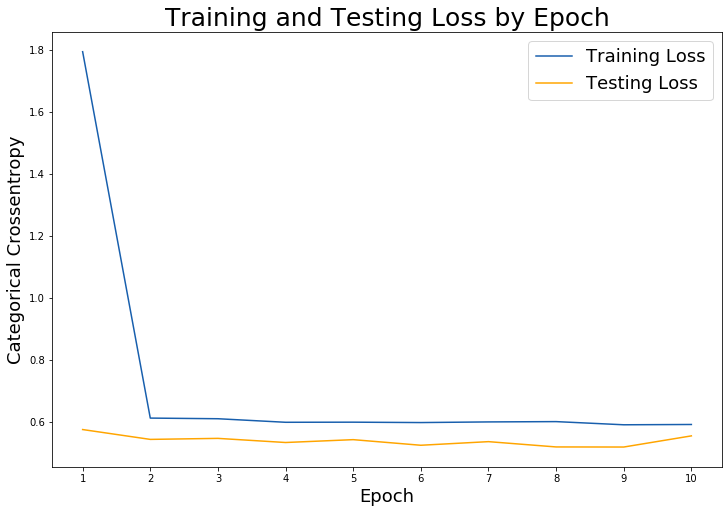

In [174]:
# Check out our train loss and test loss over epochs.
train_loss = history_1.history['loss']
test_loss = history_1.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

plt.legend(fontsize = 18);

### The weights embedding matrix have 50 dimensions

In [184]:
max_length = 4
print(history_1.history['acc'][-1],history_1.history['val_acc'][-1])

0.5752557 0.5973510146141052


In [182]:
max_length = 20
print(history_1.history['acc'][-1],history_1.history['val_acc'][-1])

0.7756781 0.7718542814254761


In [188]:
max_length = 50
print(history_1.history['acc'][-1],history_1.history['val_acc'][-1])

0.8361494 0.862582802772522


In [44]:
max_length = 80
print(history_1.history['acc'][-1],history_1.history['val_acc'][-1])

0.81236106 0.8970198631286621


In [192]:
max_length = 100
print(history_1.history['acc'][-1],history_1.history['val_acc'][-1])

0.7939084 0.889072835445404


In [76]:
df_acc = pd.DataFrame([[4,0.5753,0.5974],[20,0.7757,0.7719],[50,0.8361,0.8626],[80,0.8124,0.8970],[100,0.7939,0.8891]])
df_acc.columns = [['max_length','accuracy_train','accuracy_test']]

In [78]:
df_acc

,max_length,accuracy_train,accuracy_test
0,4,0.5753,0.5974
1,20,0.7757,0.7719
2,50,0.8361,0.8626
3,80,0.8124,0.8970
4,100,0.7939,0.8891


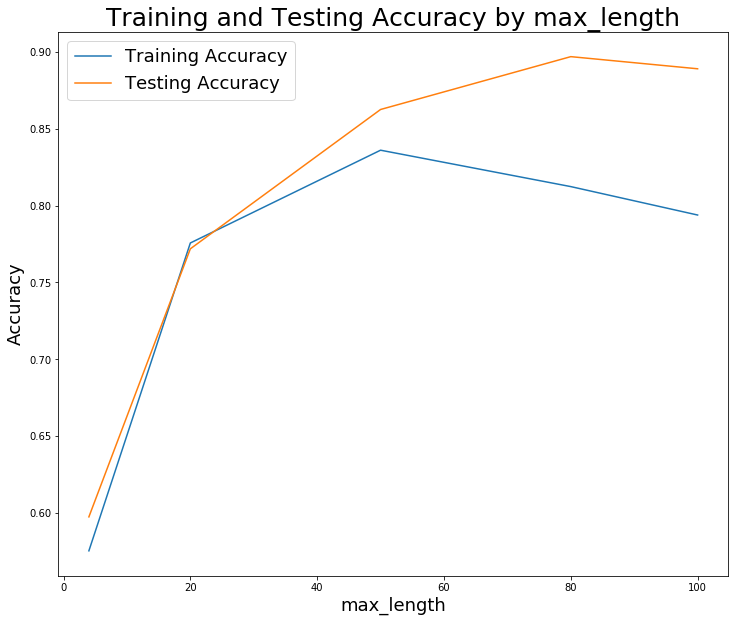

In [90]:
plt.figure(figsize=(12,10))
plt.plot([4,20,50,80,100],[0.5753,0.7757,0.8361,0.8124,0.7939],label = "Training Accuracy")
plt.plot([4,20,50,80,100],[0.5974,0.7719,0.8626,0.8970,0.8891], label="Testing Accuracy");
# Set title
plt.title('Training and Testing Accuracy by max_length', fontsize = 25)
plt.xlabel('max_length', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)

plt.legend(fontsize = 18);

In [53]:
# FFNN with embedding data
# One Hidden Layer with 64 nodes
# The embedding matrix has 100 dimensions
model_1 = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix_100],input_length=80, trainable=False)
model_1.add(e)
model_1.add(Flatten())

lam=0.1
model_1.add(Dense(64, 
                  activation = 'relu',
                  kernel_regularizer = regularizers.l2(lam)
                       ))
model_1.add(Dropout(0.5))
            
model_1.add(Dense(1,
                   activation='sigmoid'))

model_1.compile(loss='binary_crossentropy',
                 optimizer='adam',
                 metrics=['acc'])
early_stop = EarlyStopping(monitor = 'val_loss', 
                           min_delta=0, 
                           patience=5,
                           mode='auto')

history_1 = model_1.fit(X_train_sm_4,
                          y_train_sm_4,
                          validation_data=(X_test_sm_4,y_test_sm_4),
                          epochs=10,
                          batch_size=None,
                          verbose=2,
                          callbacks=[early_stop]
                          )

Train on 8996 samples, validate on 3020 samples
Epoch 1/10
 - 4s - loss: 1.3810 - acc: 0.8186 - val_loss: 0.5842 - val_acc: 0.8854
Epoch 2/10
 - 3s - loss: 0.6523 - acc: 0.8155 - val_loss: 0.5597 - val_acc: 0.8815
Epoch 3/10
 - 3s - loss: 0.6454 - acc: 0.8179 - val_loss: 0.5466 - val_acc: 0.8940
Epoch 4/10
 - 3s - loss: 0.6157 - acc: 0.8267 - val_loss: 0.5336 - val_acc: 0.9086
Epoch 5/10
 - 3s - loss: 0.6394 - acc: 0.7204 - val_loss: 0.5609 - val_acc: 0.9020
Epoch 6/10
 - 3s - loss: 0.6348 - acc: 0.7025 - val_loss: 0.6711 - val_acc: 0.8166
Epoch 7/10
 - 3s - loss: 0.6284 - acc: 0.7040 - val_loss: 0.5960 - val_acc: 0.8272
Epoch 8/10
 - 3s - loss: 0.6297 - acc: 0.7144 - val_loss: 0.4751 - val_acc: 0.8917
Epoch 9/10
 - 3s - loss: 0.6064 - acc: 0.6939 - val_loss: 0.5192 - val_acc: 0.8709
Epoch 10/10
 - 3s - loss: 0.6263 - acc: 0.7531 - val_loss: 0.4812 - val_acc: 0.8897


### The weights embedding matrix have 100 dimensions

In [54]:
max_length = 80
print(history_1.history['acc'][-1],history_1.history['val_acc'][-1])

0.7531125 0.8897351026535034
